In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 

from sklearn import metrics 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression 
from sklearn.metrics import classification_report, confusion_matrix

In [59]:
Datos = pd.read_csv('C:/Users/Natalia G/Desktop/Pacientes.csv')


In [61]:
Datos.head(299)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
292,40,1,3,152,223,0,0,181,0,0.0,0,0,2,1
293,39,1,3,118,219,0,0,140,0,1.2,1,0,2,1
294,35,1,3,120,198,0,0,130,1,1.6,1,0,2,1
295,35,0,3,138,183,0,0,182,0,1.4,0,0,0,0


,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


Text(0.5, 1.0, 'identificacion de Datos Faltantes y Atipicos')

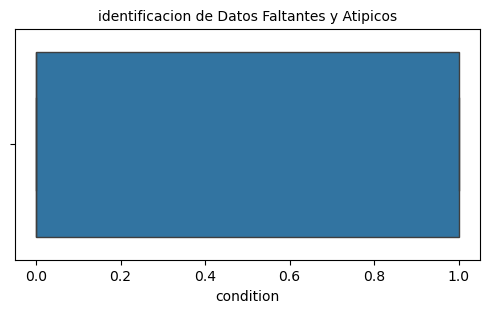

In [66]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['condition'])
plt.title('identificacion de Datos Faltantes y Atipicos', fontsize=10 )

In [36]:
#Revision de Datos Faltantes 
print("Cantidad de Registros con cero en Nivel de Age: ",Datos['age'].isin([0]).sum()) 
print("Cantidad de Registros con cero en Nivel de Sex: ",Datos['sex'].isin([0]).sum())
print("Cantidad de Registros con cero en Nivel de CP: ",Datos['cp'].isin([0]).sum())
print("Cantidad de Registros con cero en Nivel de Trestbps: ",Datos['trestbps'].isin([0]).sum())
print("Cantidad de Registros con cero en Nivel de Chol: ",Datos['chol'].isin([0]).sum())
print("Cantidad de Registros con cero en Nivel de Fbs: ",Datos['fbs'].isin([0]).sum())
print("Cantidad de Registros con cero en Nivel de Restecg: ",Datos['restecg'].isin([0]).sum())
print("Cantidad de Registros con cero en Nivel de Thalach: ",Datos['thalach'].isin([0]).sum())
print("Cantidad de Registros con cero en Nivel de Exang: ",Datos['exang'].isin([0]).sum())
print("Cantidad de Registros con cero en Nivel de Oldpeak: ",Datos['oldpeak'].isin([0]).sum())
print("Cantidad de Registros con cero en Nivel de Slope: ",Datos['slope'].isin([0]).sum())
print("Cantidad de Registros con cero en Nivel de Ca: ",Datos['ca'].isin([0]).sum())
print("Cantidad de Registros con cero en Nivel de Thal: ",Datos['thal'].isin([0]).sum())
print("Cantidad de Registros con cero en Nivel de Condition: ",Datos['condition'].isin([0]).sum())


Cantidad de Registros con cero en Nivel de Age:  0
Cantidad de Registros con cero en Nivel de Sex:  96
Cantidad de Registros con cero en Nivel de CP:  23
Cantidad de Registros con cero en Nivel de Trestbps:  0
Cantidad de Registros con cero en Nivel de Chol:  0
Cantidad de Registros con cero en Nivel de Fbs:  254
Cantidad de Registros con cero en Nivel de Restecg:  147
Cantidad de Registros con cero en Nivel de Thalach:  0
Cantidad de Registros con cero en Nivel de Exang:  200
Cantidad de Registros con cero en Nivel de Oldpeak:  96
Cantidad de Registros con cero en Nivel de Slope:  139
Cantidad de Registros con cero en Nivel de Ca:  174
Cantidad de Registros con cero en Nivel de Thal:  164
Cantidad de Registros con cero en Nivel de Condition:  160


In [40]:
#Remplazar todos los ceros con el valor medio (promedio) de la columna.
Datos['age']=Datos['age'].replace(0, Datos['age'].mean())
Datos['sex']=Datos['sex'].replace(0, Datos['sex'].mean())
Datos['cp']=Datos['cp'].replace(0, Datos['cp'].mean())
Datos['trestbps']=Datos['trestbps'].replace(0, Datos['trestbps'].mean())
Datos['chol']=Datos['chol'].replace(0, Datos['chol'].mean())
Datos['fbs']=Datos['fbs'].replace(0, Datos['fbs'].mean())
Datos['restecg']=Datos['restecg'].replace(0, Datos['restecg'].mean())
Datos['thalach']=Datos['thalach'].replace(0, Datos['thalach'].mean())
Datos['exang']=Datos['exang'].replace(0, Datos['exang'].mean())
Datos['oldpeak']=Datos['oldpeak'].replace(0, Datos['oldpeak'].mean())
Datos['slope']=Datos['slope'].replace(0, Datos['slope'].mean())
Datos['ca']=Datos['ca'].replace(0, Datos['ca'].mean())
Datos['thal']=Datos['thal'].replace(0, Datos['thal'].mean())
Datos['condition']=Datos['condition'].replace(0, Datos['condition'].mean())

In [41]:
#Revision de Datos Faltantes 
print("Cantidad de Registros con cero en Nivel de Age: ",Datos['age'].isin([0]).sum()) 
print("Cantidad de Registros con cero en Nivel de Sex: ",Datos['sex'].isin([0]).sum())
print("Cantidad de Registros con cero en Nivel de CP: ",Datos['cp'].isin([0]).sum())
print("Cantidad de Registros con cero en Nivel de Trestbps: ",Datos['trestbps'].isin([0]).sum())
print("Cantidad de Registros con cero en Nivel de Chol: ",Datos['chol'].isin([0]).sum())
print("Cantidad de Registros con cero en Nivel de Fbs: ",Datos['fbs'].isin([0]).sum())
print("Cantidad de Registros con cero en Nivel de Restecg: ",Datos['restecg'].isin([0]).sum())
print("Cantidad de Registros con cero en Nivel de Thalach: ",Datos['thalach'].isin([0]).sum())
print("Cantidad de Registros con cero en Nivel de Exang: ",Datos['exang'].isin([0]).sum())
print("Cantidad de Registros con cero en Nivel de Oldpeak: ",Datos['oldpeak'].isin([0]).sum())
print("Cantidad de Registros con cero en Nivel de Slope: ",Datos['slope'].isin([0]).sum())
print("Cantidad de Registros con cero en Nivel de Ca: ",Datos['ca'].isin([0]).sum())
print("Cantidad de Registros con cero en Nivel de Thal: ",Datos['thal'].isin([0]).sum())
print("Cantidad de Registros con cero en Nivel de Condition: ",Datos['condition'].isin([0]).sum())

Cantidad de Registros con cero en Nivel de Age:  0
Cantidad de Registros con cero en Nivel de Sex:  0
Cantidad de Registros con cero en Nivel de CP:  0
Cantidad de Registros con cero en Nivel de Trestbps:  0
Cantidad de Registros con cero en Nivel de Chol:  0
Cantidad de Registros con cero en Nivel de Fbs:  0
Cantidad de Registros con cero en Nivel de Restecg:  0
Cantidad de Registros con cero en Nivel de Thalach:  0
Cantidad de Registros con cero en Nivel de Exang:  0
Cantidad de Registros con cero en Nivel de Oldpeak:  0
Cantidad de Registros con cero en Nivel de Slope:  0
Cantidad de Registros con cero en Nivel de Ca:  0
Cantidad de Registros con cero en Nivel de Thal:  0
Cantidad de Registros con cero en Nivel de Condition:  0


Text(0.5, 1.0, 'identificacion de Datos Atipicos')

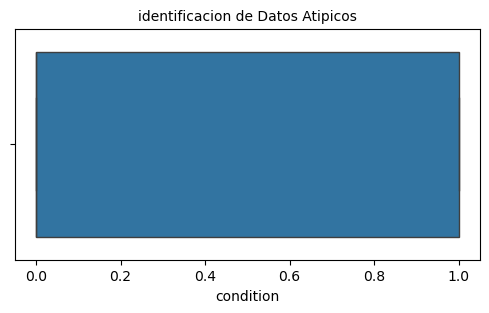

In [65]:
plt.figure(figsize=(6, 3))
sns.boxplot(x=Datos['condition'])
plt.title('identificacion de Datos Atipicos', fontsize=10 )

In [62]:
#Conteo de Datos Atipicos

nivel_minimo=20
nivel_maximo=800
Total_Atipicos=((Datos['condition']<nivel_minimo)|(Datos['condition']>nivel_maximo)).sum()
print("El total de Datos atipicos es {}".format(Total_Atipicos))

El total de Datos atipicos es 297


In [51]:
#Filtra Datos Atipicos
Datos=Datos[(Datos['condition']<nivel_maximo)&(Datos['condition']>nivel_minimo)]

In [52]:
Total_Atipicos=((Datos['condition']<nivel_minimo)|(Datos['condition']>nivel_maximo)).sum()
print("El total de Datos atipicos es {}".format(Total_Atipicos))

El total de Datos atipicos es 0


In [53]:
Datos.info()

<class 'pandas.core.frame.DataFrame'>
Index: 0 entries
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        0 non-null      int64  
 1   sex        0 non-null      float64
 2   cp         0 non-null      float64
 3   trestbps   0 non-null      int64  
 4   chol       0 non-null      int64  
 5   fbs        0 non-null      float64
 6   restecg    0 non-null      float64
 7   thalach    0 non-null      int64  
 8   exang      0 non-null      float64
 9   oldpeak    0 non-null      float64
 10  slope      0 non-null      float64
 11  ca         0 non-null      float64
 12  thal       0 non-null      float64
 13  condition  0 non-null      float64
dtypes: float64(10), int64(4)
memory usage: 0.0 bytes


In [63]:
#Total de persona con enfermedad Cardiaca

Datos['condition'].value_counts()

condition
0    160
1    137
Name: count, dtype: int64

In [64]:
Datos[['condition']].head(298)

,condition
0,0
1,0
2,0
3,1
4,0
...,...
292,1
293,1
294,1
295,0


In [70]:
X = Datos.drop('condition',axis=1)
Y = Datos['condition']

X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25, stratify=Y, random_state= 0)


In [69]:
print (X_train)

234    1
82     0
36     0
237    1
133    1
      ..
291    1
195    1
170    1
135    0
293    1
Name: condition, Length: 222, dtype: int64


In [71]:
modelo_regresion = LogisticRegression(solver = "liblinear")
modelo_regresion.fit (X_train , Y_train)

Prediccion = modelo_regresion.predict(X_test)

In [72]:
print (Y_test)

185    1
157    1
110    0
39     0
198    1
      ..
278    0
163    1
137    0
33     1
246    1
Name: condition, Length: 75, dtype: int64


In [73]:
print (Prediccion)

[1 1 0 0 1 0 1 0 0 1 0 1 1 1 1 1 0 0 0 1 0 1 1 1 0 0 0 0 0 1 0 1 1 0 0 0 0
 0 1 0 0 0 1 1 1 1 1 0 1 1 0 1 0 0 0 0 0 1 1 1 1 0 0 0 1 0 0 1 0 0 0 1 0 0
 1]


In [74]:
print(classification_report(Y_test,Prediccion))

              precision    recall  f1-score   support

           0       0.88      0.90      0.89        40
           1       0.88      0.86      0.87        35

    accuracy                           0.88        75
   macro avg       0.88      0.88      0.88        75
weighted avg       0.88      0.88      0.88        75



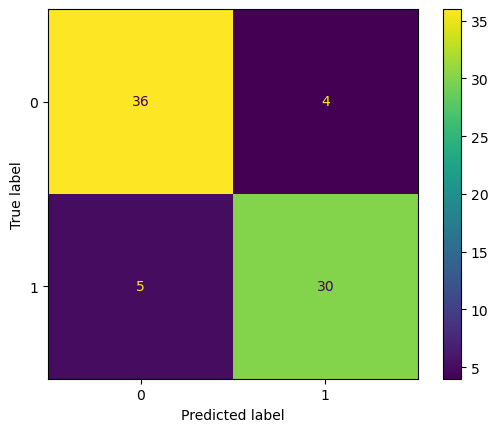

In [75]:
cm=confusion_matrix(Y_test,Prediccion)
disp=metrics.ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot()

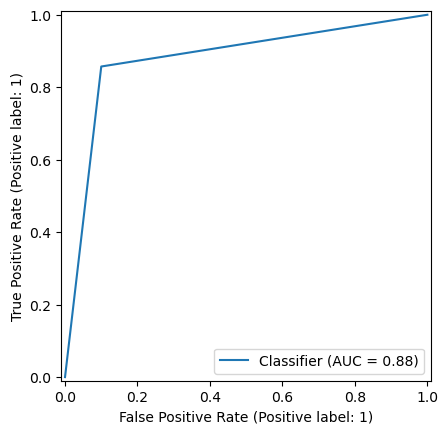

In [76]:
from sklearn.metrics import RocCurveDisplay
RocCurveDisplay.from_predictions(Y_test, Prediccion)
plt.show()